In [118]:
from IPython.display import display, Image
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from sklearn.datasets import load_diabetes

In [119]:
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [120]:
df_X = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [121]:
df_Y = pd.DataFrame(data = diabetes.target)

In [122]:
df_Y.columns= ['label']

In [123]:
df_Y

,label
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [124]:
di_data = diabetes.data
di_data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [125]:
di_tar = diabetes.target

In [126]:
print(df_X.max())
print()
print(df_X.min())
print()
print(df_Y.max())
print()
print(df_Y.min())

age    0.110727
sex    0.050680
bmi    0.170555
bp     0.132044
s1     0.153914
s2     0.198788
s3     0.181179
s4     0.185234
s5     0.133599
s6     0.135612
dtype: float64

age   -0.107226
sex   -0.044642
bmi   -0.090275
bp    -0.112400
s1    -0.126781
s2    -0.115613
s3    -0.102307
s4    -0.076395
s5    -0.126097
s6    -0.137767
dtype: float64

label    346.0
dtype: float64

label    25.0
dtype: float64


In [127]:
is_0 = df_X['bp'] == 0
df_X[is_0]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6


In [128]:
df_X.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


In [129]:
X_train, X_test, y_train, y_test = train_test_split(di_data, di_tar, test_size=0.4, random_state=42)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([136.98700569, 181.29026358, 131.39813363, 276.83755264,
       119.9898175 ,  91.81529016, 261.50587469, 182.14843262,
        81.08102924, 112.79978964,  95.19314591, 158.41876111,
        60.7756559 , 201.25012492,  97.11237128, 132.17402408,
       214.8508728 , 245.43878198, 198.8964991 , 215.20804362,
       204.03093648,  85.83826781,  68.80869747, 186.95254133,
       159.31703413, 161.26712319, 192.46493714, 175.43111116,
        48.26100555, 109.0246626 , 178.78951235,  89.26266563,
       130.34116979, 177.5005801 , 168.73540384, 196.5916872 ,
       120.26751581, 115.26426714, 139.41263224,  57.65666699,
        69.3273383 , 107.48420947, 161.49733051, 141.46672007,
       163.43454791,  64.4431009 ,  74.99143118, 106.29100987,
        53.20262214, 161.94214459, 158.40335901,  64.70828341,
       107.24965815, 105.79540588, 169.33046984, 162.82404163,
        91.40705207, 209.52045936, 119.14401896,  68.51825873,
       182.78215515, 202.65419215, 145.08902223, 104.82

In [130]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse


2832.9913004407

In [133]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

<class 'numpy.ndarray'>


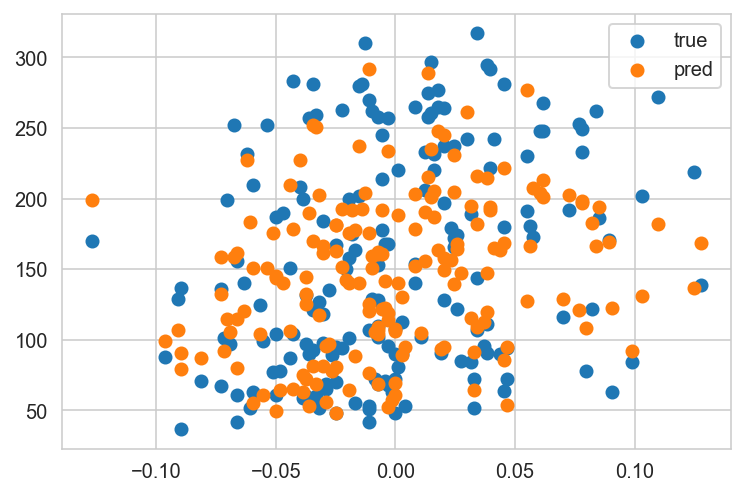

<class 'numpy.ndarray'>


In [134]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.legend()
plt.show()

# 먼저 기존에 있던 데이터로 회귀를 시키니 성능이 영 좋지 못했다.

# 그래서 데이터 칼럼을 줄여서 다시 돌렸으나 더 좋지 못한 결과가 나왔다.

# 데이터와 정답 데이터 훈련, 테스트로 나누기

In [90]:
X_train, X_test, y_train, y_test = train_test_split(di_data, di_tar, test_size=0.4, random_state=42)

# 가중치 w, b 모델 준비하기

In [91]:
W = np.random.rand(len(diabetes.feature_names))

In [92]:
b = np.random.rand()

In [59]:
def model(X, W, b):
    predictions = 0
    for i in range(len(diabetes.feature_names)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [60]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

# 손실함수 loss 준비하기

In [61]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# 기울기 함수 구현

In [62]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [24]:
dW, db = gradient(di_data, W, b, di_tar)
print("dW:", dW)
print("db:", db)
print(di_data.T.shape)

dW: [ -60.590782    -13.75844127 -189.62386074 -142.63048819  -68.30530399
  -56.02910797  127.63155089 -139.0176305  -182.86958838 -123.5263196 ]
db: -303.991195661756
(10, 442)


# 학습률 정하기

In [25]:
LEARNING_RATE = 0.01

# 모델 학습

In [27]:
losses = []
em = 0
i = 1

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        

Iteration 100 : Loss 4951.6679
Iteration 200 : Loss 3953.0324
Iteration 300 : Loss 3634.2923
Iteration 400 : Loss 3452.5128
Iteration 500 : Loss 3334.6759
Iteration 600 : Loss 3251.9752
Iteration 700 : Loss 3190.9236
Iteration 800 : Loss 3144.4632
Iteration 900 : Loss 3108.4550
Iteration 1000 : Loss 3080.2216
Iteration 1100 : Loss 3057.9039
Iteration 1200 : Loss 3040.1510
Iteration 1300 : Loss 3025.9532
Iteration 1400 : Loss 3014.5436
Iteration 1500 : Loss 3005.3328
Iteration 1600 : Loss 2997.8646
Iteration 1700 : Loss 2991.7836
Iteration 1800 : Loss 2986.8117
Iteration 1900 : Loss 2982.7301
Iteration 2000 : Loss 2979.3659
Iteration 2100 : Loss 2976.5821
Iteration 2200 : Loss 2974.2697
Iteration 2300 : Loss 2972.3415
Iteration 2400 : Loss 2970.7274
Iteration 2500 : Loss 2969.3712
Iteration 2600 : Loss 2968.2273
Iteration 2700 : Loss 2967.2589
Iteration 2800 : Loss 2966.4360
Iteration 2900 : Loss 2965.7339
Iteration 3000 : Loss 2965.1328
Iteration 3100 : Loss 2964.6160
Iteration 3200 : 

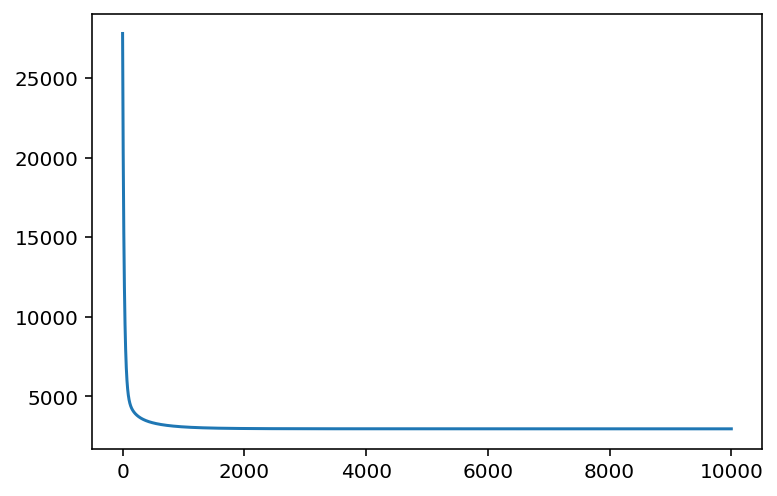

In [28]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# 성능 확인

In [29]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2871.943057810163

# 데이터 시각화 하기

In [116]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

## 처음에 모델을 잘못 구현했나 싶어 내장되어 있는 함수를 사용했지만

## 결측치가 내려가지 않았다.

# 그래서 데이터의 이상치를 보고 제거한 후 해보기로 했습니다.

# 데이터 전처리를 하기전 데이터 시각화로 형태를 보기로 했습니다.

C:\Users\samsung\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='label', ylabel='Density'>

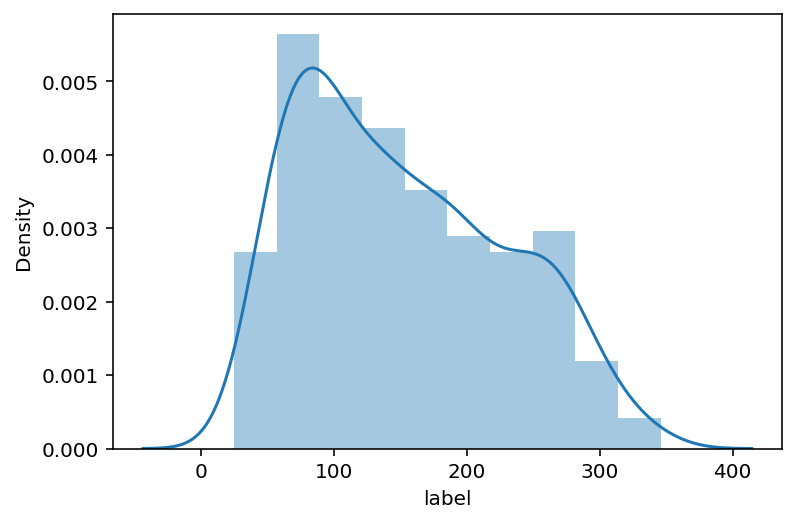

In [33]:
sns.distplot(df_Y['label'])

In [32]:
import seaborn as sns

In [34]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index


In [35]:
df_Y.loc[(outlier(df_Y, 'label' , 2))]

,label
9,310.0
32,341.0
138,336.0
141,317.0
254,310.0
256,346.0
262,308.0
290,332.0
359,311.0
362,321.0


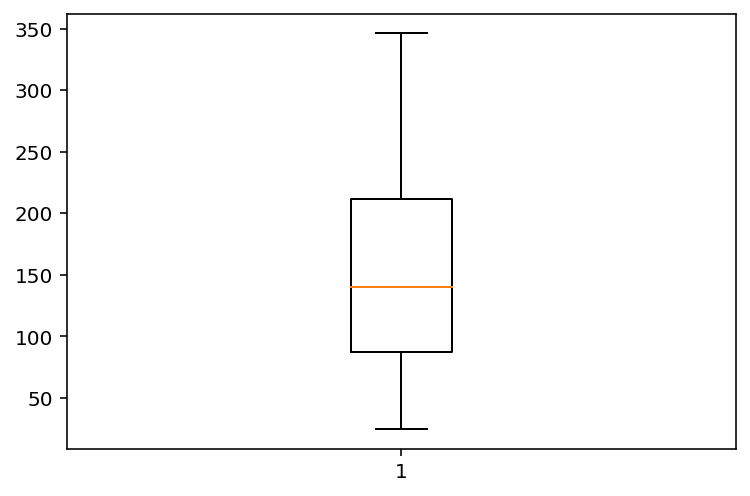

In [36]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot(di_tar)
plt.show()

In [37]:
Q3, Q1 = np.percentile(di_tar, [75 ,25])
IQR = Q3 - Q1
IQR

124.5

In [38]:
df_Y[(Q1- 1.5 *IQR > df_Y) | (Q3+ 1.5 * IQR < df_Y)]
len(df_Y[(Q1- 0 *IQR < df_Y) | (Q3+ 0 * IQR < df_Y)])

442

In [39]:
Q1-1.5*IQR

-99.75

In [40]:
Q3+1.5*IQR

398.25

In [41]:
di_tar.min()

25.0

In [42]:
di_tar.max()

346.0

In [43]:
len(di_tar[(Q1- 0.1 *IQR > di_tar) | (Q3+ 1.5 * IQR < di_tar)])

85

## IQR로 이상치를 확인한 결과 Q1 - 1.5 * IQR ~ Q3 + 1.5 * IQR사이에 값들이 다 있었다

## 그래서 데이터의 범위를 50퍼 75퍼로 정해 학습하기로 했다.

In [44]:
((df_Y[(Q1 > df_Y) | (Q3 < df_Y)]).loc[0])

label   NaN
Name: 0, dtype: float64

In [45]:
temp = str((df_Y[(Q1 > df_Y) | (Q3 < df_Y)]).loc[0].label)
temp1 = ((df_Y[(Q1 > df_Y) | (Q3 < df_Y)]).loc[0].name)
print(temp)
type(temp1)
type(di_data)

nan


numpy.ndarray

In [46]:
isfal = []
count = 0
for i in range(442) :
    temp = str((df_Y[(df_Y > Q1) & (df_Y < Q3)]).loc[i].label)
    if temp != 'nan':
        isfal.append(count)
    count += 1
print(isfal)
print(len(isfal))

[0, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 24, 25, 26, 28, 30, 35, 39, 40, 43, 46, 47, 49, 50, 53, 54, 55, 58, 59, 61, 63, 65, 66, 67, 68, 69, 72, 73, 76, 77, 79, 80, 83, 85, 87, 89, 90, 91, 93, 94, 95, 96, 98, 100, 101, 103, 104, 106, 107, 110, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 131, 132, 134, 140, 144, 146, 147, 148, 149, 151, 154, 155, 158, 159, 162, 163, 169, 173, 174, 175, 179, 180, 182, 183, 185, 186, 187, 188, 191, 192, 193, 195, 197, 198, 199, 200, 202, 205, 206, 207, 208, 210, 219, 221, 223, 225, 227, 228, 231, 233, 235, 241, 244, 245, 252, 253, 255, 258, 261, 263, 264, 267, 270, 271, 272, 275, 278, 279, 281, 283, 284, 293, 296, 298, 302, 305, 307, 308, 309, 310, 311, 312, 313, 314, 315, 317, 318, 319, 320, 325, 326, 329, 331, 333, 335, 337, 339, 342, 343, 344, 345, 346, 347, 348, 349, 353, 358, 361, 365, 368, 369, 371, 373, 374, 376, 381, 382, 383, 387, 388, 392, 397, 400, 401, 402, 407, 408, 409, 410, 411, 413, 414, 415, 420, 423, 424, 425, 426,

In [47]:
print(di_data)
print(di_data.shape)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
(442, 10)


In [48]:
data_50 = np.array([])

for i in range(len(isfal)):
    temp = np.array([])
    temp = np.append(temp, di_data[isfal[i]])
    data_50 = np.append(data_50, temp)
    
print(data_50.shape)
data_50 = data_50.reshape(219,10)

(2190,)


In [49]:
di_50 = (di_tar[(di_tar > Q1) & (di_tar < Q3)])
di_50.shape

(219,)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data_50, di_50, test_size=0.4, random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression

model_s = LinearRegression()
model_s.fit(X_train, y_train)
predictions = model_s.predict(X_test)
print(predictions)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(mse)
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

[[249.5780248 ]
 [ 48.10476003]
 [202.44804187]
 ...
 [208.90301286]
 [309.43843307]
 [-96.46050621]]
19954.641809497978


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [194]:
#isfal = []
#count = 0
#for i in range(442) :
#    temp = str((df_Y[(Q1 - 0.2 * IQR > df_Y) | (Q3 + 0.2 * IQR < df_Y)]).loc[i].label)
#    if temp != 'nan':
#        isfal.append(count)
#    count += 1
#print(isfal)

[9, 21, 23, 29, 31, 32, 36, 37, 38, 41, 42, 44, 45, 52, 56, 57, 60, 62, 70, 71, 75, 78, 81, 82, 86, 88, 92, 97, 102, 105, 111, 112, 113, 114, 116, 117, 129, 130, 135, 137, 138, 139, 141, 143, 145, 150, 152, 156, 160, 165, 168, 170, 172, 176, 184, 190, 201, 204, 213, 215, 216, 217, 222, 229, 232, 234, 238, 239, 240, 243, 247, 248, 250, 251, 254, 256, 259, 260, 262, 266, 268, 273, 276, 280, 286, 290, 291, 294, 297, 300, 304, 306, 322, 323, 324, 327, 330, 332, 336, 341, 350, 354, 355, 356, 359, 360, 362, 363, 364, 367, 378, 379, 380, 389, 390, 394, 395, 396, 398, 403, 404, 405, 412, 416, 417, 419, 428, 434, 436, 441]


In [78]:
W = np.random.rand(len(diabetes.feature_names))
b = np.random.rand()
losses = []
em = 0
i = 1

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 1707.1509
Iteration 200 : Loss 1331.6032
Iteration 300 : Loss 1297.7659
Iteration 400 : Loss 1276.0654
Iteration 500 : Loss 1259.0535
Iteration 600 : Loss 1245.3931
Iteration 700 : Loss 1234.2093
Iteration 800 : Loss 1224.8833
Iteration 900 : Loss 1216.9737
Iteration 1000 : Loss 1210.1639
Iteration 1100 : Loss 1204.2239
Iteration 1200 : Loss 1198.9856
Iteration 1300 : Loss 1194.3238
Iteration 1400 : Loss 1190.1444
Iteration 1500 : Loss 1186.3750
Iteration 1600 : Loss 1182.9594
Iteration 1700 : Loss 1179.8528
Iteration 1800 : Loss 1177.0186
Iteration 1900 : Loss 1174.4269
Iteration 2000 : Loss 1172.0525
Iteration 2100 : Loss 1169.8738
Iteration 2200 : Loss 1167.8722
Iteration 2300 : Loss 1166.0315
Iteration 2400 : Loss 1164.3371
Iteration 2500 : Loss 1162.7763
Iteration 2600 : Loss 1161.3376
Iteration 2700 : Loss 1160.0106
Iteration 2800 : Loss 1158.7859
Iteration 2900 : Loss 1157.6551
Iteration 3000 : Loss 1156.6103
Iteration 3100 : Loss 1155.6446
Iteration 3200 : 

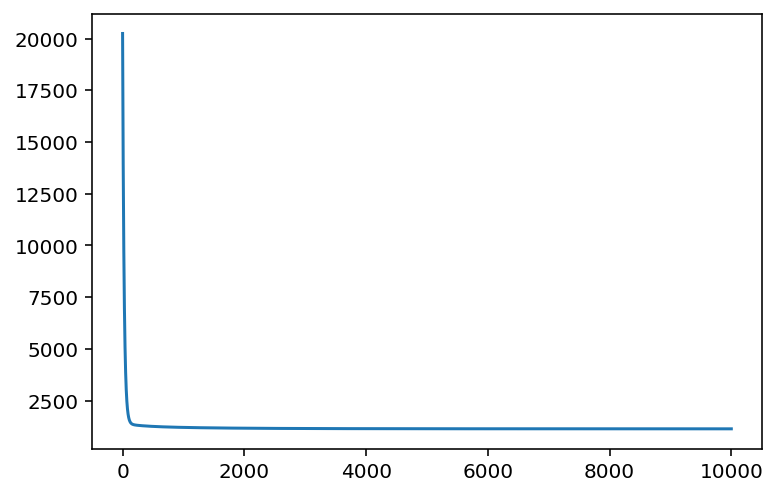

In [76]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [77]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

1125.4536261269934

In [250]:
isfal = []
count = 0
for i in range(442) :
    temp = str((df_Y[(df_Y > Q1 - 0.75 * IQR) & (df_Y < Q3 + 0.75 * IQR)]).loc[i].label)
    if temp != 'nan':
        isfal.append(count)
    count += 1
print(isfal)
print(len(isfal))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 2

In [252]:
data_75 = np.array([])

for i in range(len(isfal)):
    temp = np.array([])
    temp = np.append(temp, di_data[isfal[i]])
    data_75 = np.append(data_75, temp)
    
print(data_75.shape)
data_75 = data_75.reshape(430,10)

(4300,)


In [253]:
di_75 = (di_tar[(di_tar > Q1 - 0.75 * IQR) & (di_tar < Q3 + 0.75 * IQR)])
di_75.shape

(430,)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(data_75, di_75, test_size=0.4, random_state=42)

NameError: name 'data_75' is not defined

[167.25105771 147.15485721 155.13047151 128.26159703 135.10253317
 114.8615596  143.37464073 154.09985645 120.70163185 131.94544769
 146.40256941 141.08686339 162.39500281 141.2744232  150.66257852
 135.57530874 134.73199121 135.69504382 140.02091993 150.4611872
 151.24353445 157.9350738  163.86368559 142.19235503 140.71373499
 128.48723878 143.15544178 148.28566348 127.25780522 138.28359077
 142.99621143 148.03151577 132.18375553 127.33287781 111.15808253
 139.54073473 125.10632528 152.86627329 149.485419   149.401197
 154.78529197 131.88800362 138.59078207 124.20000331 147.58019215
 148.86480939 165.18856887 147.26490041 110.72455957 152.22127677
 141.24708539 132.03925241 119.60317417 155.48535285 133.44100119
 155.01478493 139.55049474 161.29444491 142.27809748 139.25013215
 166.01913699 113.84355204 147.44727114 157.4358927  141.38254757
 119.63291194 160.26511551 152.78463966 129.57706331 162.56988296
 120.34650701 115.61796806 159.92346779 130.92260979 153.7830331
 129.9266564  

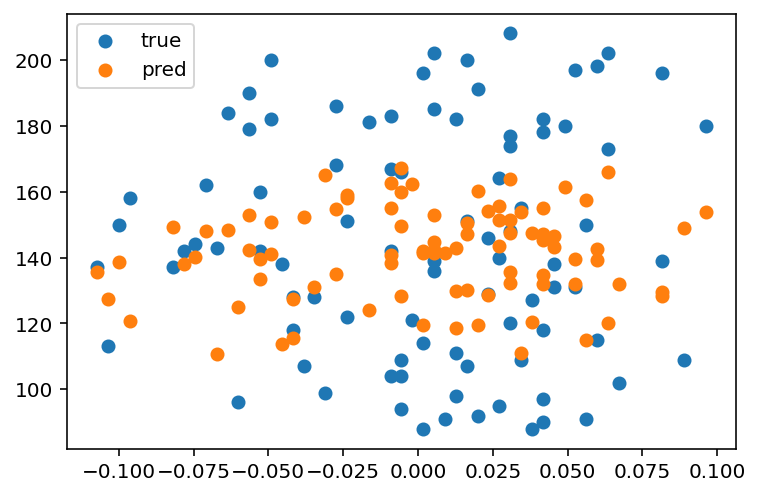

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(mse)
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

#            모델 성능            : 기존 파이썬에 있는 모델 > 직접 설계한 모델

#            데이터 전처리     : 전처리 후 > 전처리 전

#            전처리 범위         :  Q1 ~ Q3 >  Q1 - 0.75 * IQR ~ Q3 + 0.75 * IQR

# 결론 : 데이터는 전처리를 한 후에 성능이 많이 좋아졌다.

# 자전거 데이터 시작~~

# 1. 데이터 가져오기

In [95]:
from IPython.display import display, Image
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import datetime
import os
bike = 'temp/bike-sharing-demand/train.csv'
#bike = 'C:/Users/samsung/aiffel/temp/bike-sharing-demand/train.csv'
b_data = pd.read_csv(bike)
print(type(b_data['datetime'].dtype))
print(os.getcwd())

<class 'numpy.dtype[object_]'>
C:\Users\samsung\aiffel


In [96]:
b_data['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [97]:
b_data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [98]:
b_data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [99]:
b_data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [100]:
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [101]:
b_data['datetime'] = b_data['datetime'].astype('str')
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [102]:
b_data['datetime'] = pd.to_datetime(b_data['datetime'])

In [103]:
b_data['datetime'].dt.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64

In [104]:
b_data['year'] = b_data['datetime'].dt.year
b_data['month'] = b_data['datetime'].dt.month
b_data['day'] = b_data['datetime'].dt.day
b_data['hour'] = b_data['datetime'].dt.hour
b_data['min'] = b_data['datetime'].dt.minute
b_data['sec'] = b_data['datetime'].dt.second

In [105]:
b_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


# 3. year, month, day, hour, minute, second 데이터 개수 시각화하기

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

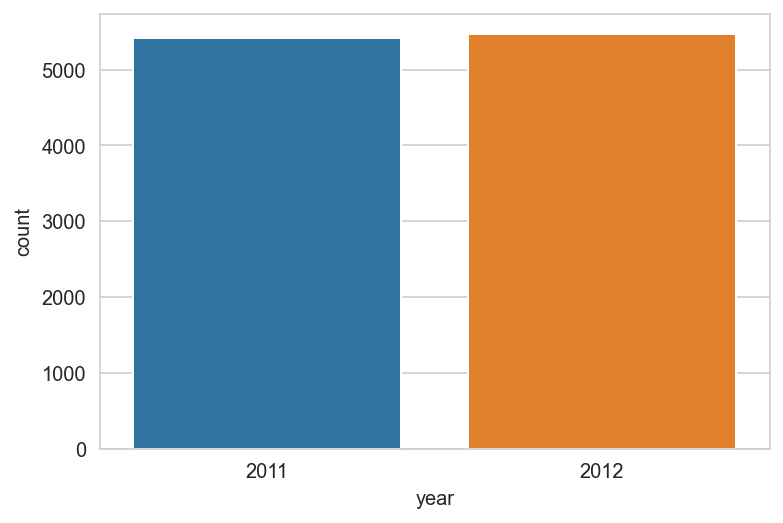

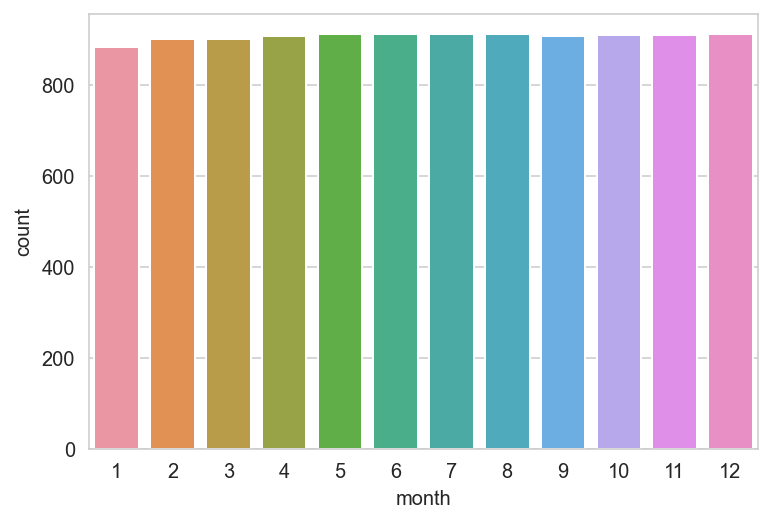

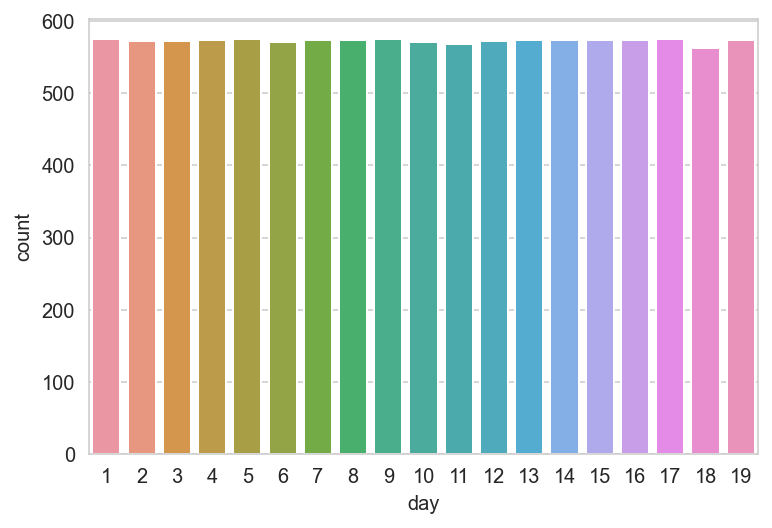

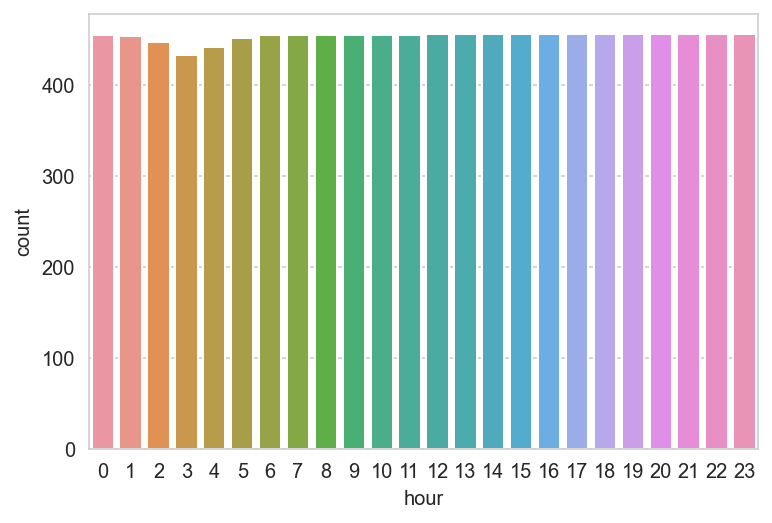

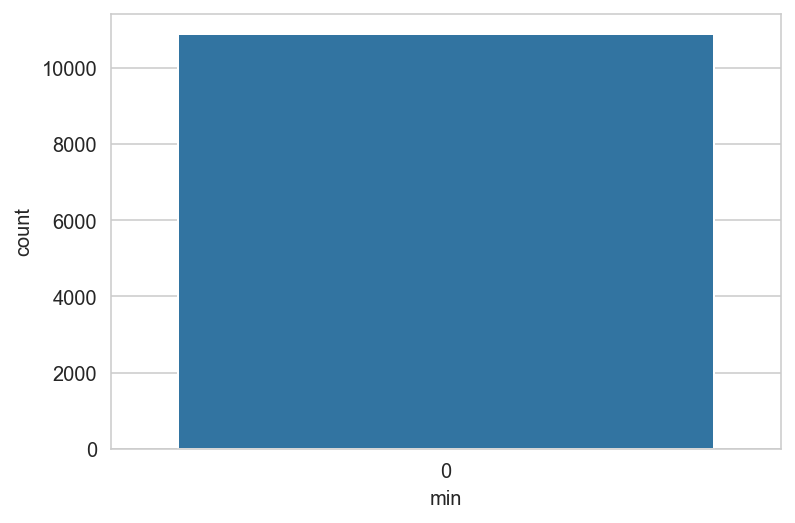

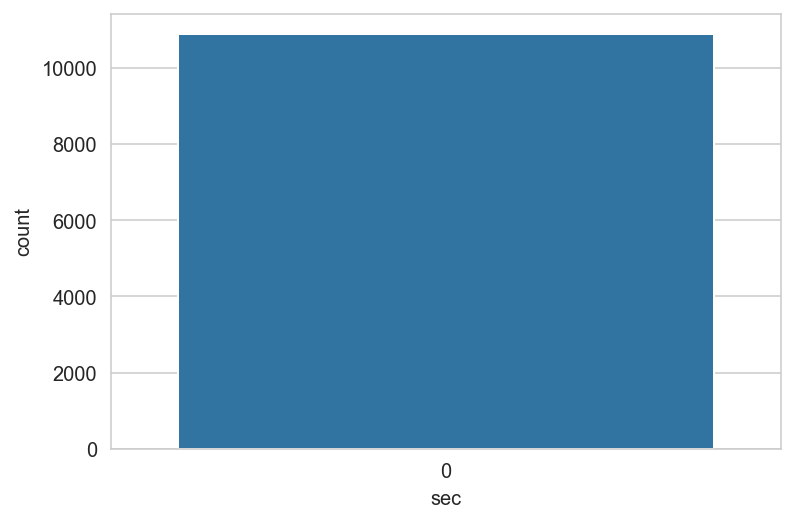

In [107]:
sns.set_style('whitegrid')
sns.countplot(x = "year",  data = b_data)
plt.show()
sns.countplot(x = "month",  data = b_data)
plt.show()
sns.countplot(x = "day",  data = b_data)
plt.show()
sns.countplot(x = "hour",  data = b_data)
plt.show()
sns.countplot(x = "min",  data = b_data)
plt.show()
sns.countplot(x = "sec",  data = b_data)
plt.show()

# 4. X, y 컬럼 선택 및 train/test 데이터 분리

In [108]:
X = b_data.copy()
X = X.drop([X.columns[0], X.columns[9], X.columns[10], X.columns[11] ,X.columns[16], X.columns[17]], axis = 1)
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


In [109]:
y = pd.DataFrame(b_data['count'], columns = ['count'])
y

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [139]:
X = X.to_numpy()
y = y.to_numpy()

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. LinearRegression 모델 학습

# 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [142]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(mse)
rmse = mse **(1/2)
rmse

[[249.5780248 ]
 [ 48.10476003]
 [202.44804187]
 ...
 [208.90301286]
 [309.43843307]
 [-96.46050621]]
19954.641809497636


141.26089979006093

# 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

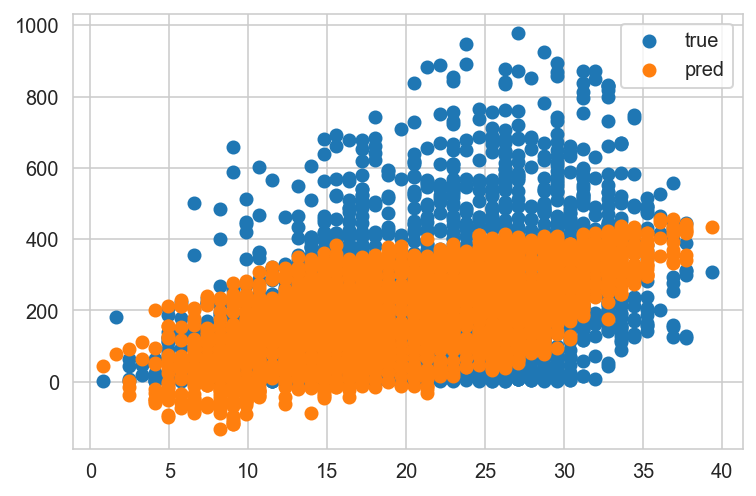

In [152]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
plt.scatter(X_test[:,4], y_test, label="true")
plt.scatter(X_test[:,4], predictions, label="pred")
plt.legend()
plt.show()

# 데이터 전처리를 했을 때 


In [153]:
Q3, Q1 = np.percentile(y, [75 ,25])
IQR = Q3 - Q1
IQR

242.0

In [169]:
print(y[(Q1- 1.5 *IQR > y) | (Q3+ 1.5 * IQR < y)])
y[(Q1- 1.5 *IQR > y) | (Q3+ 1.5 * IQR < y)].shape

[712 676 734 662 782 749 713 746 651 686 690 679 685 648 721 801 729 757
 800 684 744 759 822 698 655 692 744 704 656 738 671 678 678 660 658 681
 712 676 673 781 775 677 748 776 681 743 666 729 813 704 706 769 680 717
 710 705 732 770 779 659 678 733 650 873 846 852 868 745 812 669 704 730
 672 694 668 679 702 684 686 678 662 665 834 822 710 850 790 668 724 782
 681 869 813 700 793 723 651 800 831 681 653 713 857 744 671 719 867 823
 653 823 693 723 673 811 795 747 730 722 689 849 872 649 872 819 674 830
 814 702 795 825 713 835 667 755 794 661 770 772 679 657 771 777 681 837
 891 652 739 865 767 668 741 671 858 843 705 868 814 737 858 862 686 698
 810 811 730 673 818 812 812 854 682 851 848 649 682 897 832 677 668 791
 669 654 856 839 725 863 839 662 808 835 719 772 792 694 668 757 729 696
 701 671 730 871 968 750 970 877 770 925 977 758 884 852 674 766 894 808
 706 704 715 654 783 729 656 694 683 842 774 672 797 886 892 784 856 715
 687 809 917 810 738 901 887 785 900 761 743 710 65

(300,)

In [163]:
len(y[(Q1- 1.5 *IQR > y) | (Q3+ 1.5 * IQR < y)])
type(y)

numpy.ndarray

In [168]:
print(np.where(y[(Q1- 1.5 *IQR > y) | (Q3+ 1.5 * IQR < y)]))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [183]:
X_cut = X.copy()
print(X_cut.shape)
X_cut[300]

(10886, 12)


array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 4.9200e+00,
       6.8200e+00, 5.0000e+01, 1.2998e+01, 2.0110e+03, 1.0000e+00,
       1.3000e+01, 2.3000e+01])

In [184]:
X_cut = X_cut[300:]
X_cut.shape

(10586, 12)

In [193]:
y_cut = y.copy()

In [194]:
y_cut = y_cut[300:]

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_cut, y_cut, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(mse)
rmse = mse **(1/2)
rmse

[[306.44869754]
 [220.53821009]
 [155.10633901]
 ...
 [158.59112929]
 [  8.89198257]
 [390.4172087 ]]
19603.838559663116


140.0137084705034

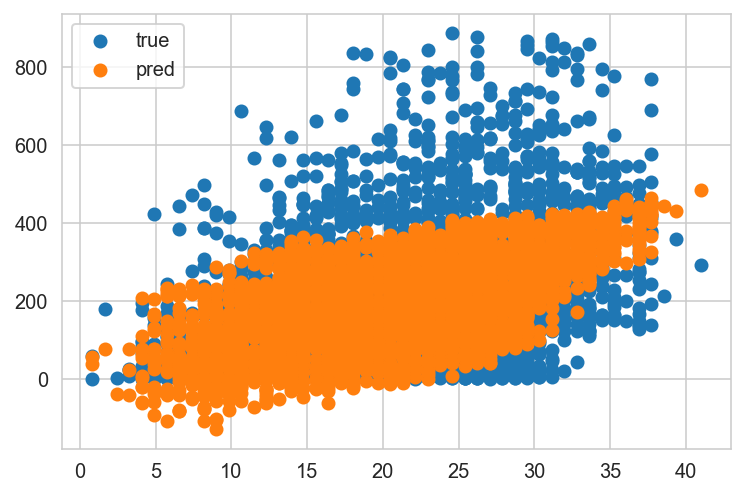

In [200]:
from IPython.display import display, Image
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
plt.scatter(X_test[:,4], y_test, label="true")
plt.scatter(X_test[:,4], predictions, label="pred")
plt.legend()
plt.show()

# 최종 결론

# 데이터 이상치를 제거하면 rmse값이 줄어 든것을 확인 할수 있었다.

# 그리고 데이터 범위도 크게 변하지 않았다.

# 그러나 당뇨병 같은 경우 너무 많은 데이터를 제거하면

### 줄어든 loss값만 보면 문제가 없지만그래프를 보면 예측 값 범위가 한정적인 문제점을 볼 수 있었다.

### 두 가지 결과를 보고 내린 결론은 데이터 이상치에 벗어난 값만 제거하는 것이 낫다고 생각합니다.
